<a href="https://colab.research.google.com/github/gcochlar/Bootcamp_DataScience/blob/main/Modulo_06/Bootcamp_Mod6_Aula02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://drive.google.com/uc?id=16O9eMrtSeRDnDpZgmneXj34eIClCntvg'>

# ***Data Science*** **Aplicado em Finanças**

---

Esse notebook servirá para o acompanhamento das aulas do Módulo 06 do ***Bootcamp de Data Science Aplicada*** realizado pela Alura.

O Módulo 6 é um módulo extra especialmente desenvolvido para este *Bootcamp* e é voltado para a área financeira, mais especificamente para a área de análise de crédito.

Além do desenvolvimento do modelo de *machine learning* em si, também está no escopo o *deploy* através do *streamlit*.

---

>Agora chegou o momento de consolidar seu conhecimento em uma nova área. Vamos sair do assunto saúde e desenvolver um projeto completo de Data Science aplicado a finanças. Será mais um projeto incrível para complementar seu portfólio e principalmente para te ensinar assuntos específicos desta área tão relevante.
>
>Então prepare os equipamentos porque nosso mergulho será em outros mares!
---

## **Aula 01 - Contextualização do Mercado Financeiro**
---


A aula começou falando dos pilares que temos na cadeia de crédito. São eles:

* Prospecção
* Concessão
* Gestão de Risco
* Recuperação

O modelo que iremos trabalhar estará no pilar **CONCESSÃO**. Vamos trabalhar o modelo de decisão que irá avaliar a concessão ou não do crédito solicitado.

Na sequência fomos informados que a base que iremos usar é uma adaptação de uma base que foi disponibilizada em um desafio do **Kaggle**.

São duas bases de dados, com os clientes cadastrados e com os empréstimos aprovados.

Baixei as bases e fiz *upload* para o meu repositório do **GitHub**.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
url_cadastrados = 'https://github.com/gcochlar/Bootcamp_DataScience/blob/main/Modulo_06/dados/clientes_cadastrados.zip?raw=true'
url_aprovados = 'https://github.com/gcochlar/Bootcamp_DataScience/blob/main/Modulo_06/dados/clientes_aprovados.zip?raw=true'

Vamos começar importando a base de clientes cadastrados.

In [3]:
dados_cadastrados = pd.read_csv(url_cadastrados, compression='zip')
dados_cadastrados.head()

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
1,5008805,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
2,5008806,H,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Seguranca,2.0,3.1
3,5008808,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
4,5008809,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4


In [4]:
dados_cadastrados.shape

(438557, 18)

Essa primeira base, de clientes cadastrados, é bem extensa.

Tem quase 440 mil registros com 18 variáveis diferentes.

Imediatamente chama a atenção a coluna **`ID_Cliente`** que deve servir como chave de identificação de cada cliente, mas isso precisa ser confirmado.

Também chama a atenção o fato de termos linhas aparentemente duplicadas (0 e 1 ou 3 e 4, por exemplo).

Vamos importar e olhar também nossa base de empréstimos aprovados.

In [5]:
dados_aprovados = pd.read_csv(url_aprovados, compression='zip')
dados_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias
4,5001712,0,pagamento realizado


In [6]:
dados_aprovados.shape

(1048575, 3)

A base de empréstimos aprovados também é bem extensa, com mais de 1 milhão de registros, apesar de contar com apenas 3 variáveis.

Também conta com uma coluna **`ID_Cliente`** mas que já podemos ver que apresenta duplicidades. Deverá servir para conectar as duas bases de dados.

Vamos focar, inicialmente, na análise exploratória da base de clientes cadastrados.

In [7]:
dados_cadastrados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438557 non-null  int64  
 1   Genero                 438557 non-null  object 
 2   Tem_Carro              438557 non-null  int64  
 3   Tem_Casa_Propria       438557 non-null  int64  
 4   Qtd_Filhos             438557 non-null  int64  
 5   Rendimento_Anual       438557 non-null  float64
 6   Categoria_de_renda     438557 non-null  object 
 7   Grau_Escolaridade      438557 non-null  object 
 8   Estado_Civil           438557 non-null  object 
 9   Moradia                438557 non-null  object 
 10  Idade                  438557 non-null  float64
 11  Tem_Celular            438557 non-null  int64  
 12  Tem_telefone_trabalho  438557 non-null  int64  
 13  Tem_telefone_fixo      438557 non-null  int64  
 14  Tem_email              438557 non-nu

Vamos tentar confirmar nossa ideia de que a coluna **`ID_Cliente`** pode ser usada como identificador único de nossos clientes.

In [8]:
dados_cadastrados.ID_Cliente.value_counts()

7603224    2
7742853    2
7836711    2
7091721    2
7022327    2
          ..
5372264    1
6412652    1
6410605    1
6367602    1
6291456    1
Name: ID_Cliente, Length: 438510, dtype: int64

O fato de termos ocorrências duplas de alguns **IDs** indica algum problema em nossa base de dados.

Vamos verificar se temos registros duplicados, ou seja, linhas completamente iguais.

In [9]:
dados_cadastrados.duplicated().sum()

0

Não temos linhas duplicadas, mas a duplicidade de **IDs** irá nos atrapalhar mais adiante.

Precisamos verificar qual o tamanho do nosso problema. Em uma base de quase 440 mil registros, quantos estão duplicados?

In [10]:
dados_cadastrados[dados_cadastrados.ID_Cliente.duplicated(keep=False)].sort_values(by='ID_Cliente')

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
426818,7022197,H,1,1,3,135000.0,Empregado,Ensino medio,Casado,Casa propria,33.0,1,0,0,1,Construcao Civil,5.0,2.0
425023,7022197,M,0,1,0,450000.0,Associado comercial,Ensino superior,Separado,Casa propria,54.0,1,0,0,1,Outros,1.0,4.9
431545,7022327,M,0,1,0,135000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,40.0,1,0,0,0,Alta tecnologia,1.0,14.5
431911,7022327,H,1,1,0,256500.0,Associado comercial,Ensino superior,Casado,Casa propria,59.0,1,0,0,1,Equipe principal,2.0,4.6
425486,7023108,H,1,1,1,67500.0,Empregado,Ensino medio,Casado,Casa propria,42.0,1,1,0,0,Equipe principal,3.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426563,7836711,M,0,1,2,292500.0,Empregado,Ensino superior,Casado,Casa propria,38.0,1,0,1,0,Contabilidade,4.0,12.0
421464,7836971,H,1,0,1,157500.0,Empregado,Ensino medio,Casado,Casa propria,38.0,1,0,0,0,Outros,3.0,15.1
428620,7836971,M,0,1,0,103500.0,Empregado,Ensino medio,Uniao estavel,Casa propria,37.0,1,0,1,0,Venda,2.0,7.7
422068,7838075,H,0,1,0,337500.0,Associado comercial,Ensino medio,Casado,Casa propria,50.0,1,0,0,1,Motorista,2.0,3.5


Temos 94 registros duplicados. Isso representa em torno de 0,02% de nossa base.

Inicialmente, podemos desprezar esses registros para avançarmos em nossa análise.

In [11]:
id_repetidos = dados_cadastrados[dados_cadastrados.ID_Cliente.duplicated(keep=False)].sort_values(by='ID_Cliente')['ID_Cliente']
id_repetidos

426818    7022197
425023    7022197
431545    7022327
431911    7022327
425486    7023108
           ...   
426563    7836711
421464    7836971
428620    7836971
422068    7838075
423702    7838075
Name: ID_Cliente, Length: 94, dtype: int64

In [12]:
dados_cad_id_unicos = dados_cadastrados.drop(id_repetidos.index)
dados_cad_id_unicos

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
1,5008805,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
2,5008806,H,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Seguranca,2.0,3.1
3,5008808,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
4,5008809,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,H,0,1,0,135000.0,Pensionista,Ensino medio,Separado,Casa propria,62.0,1,0,0,0,Outros,1.0,-1000.7
438553,6840222,M,0,0,0,103500.0,Empregado,Ensino medio,Solteiro,Casa propria,44.0,1,0,0,0,Construcao Civil,1.0,8.2
438554,6841878,M,0,0,0,54000.0,Associado comercial,Ensino superior,Solteiro,Mora com os pais,22.0,1,1,0,0,Venda,1.0,1.0
438555,6842765,M,0,1,0,72000.0,Pensionista,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Outros,2.0,-1000.7


In [13]:
(dados_cad_id_unicos.ID_Cliente.value_counts() > 1).sum()

0

Agora estamos com um novo *dataframe*, sem nenhum **ID** duplicado.

Conforme mencionado antes, nossa base aparentava ter dados em duplicidade também nas demais colunas, ou seja, clientes com vários **IDs** diferentes.

Vamos verificar qual o impacto disso em nosso *dataset*.

In [14]:
dados_cadastrados.drop(['ID_Cliente'], axis=1).duplicated().sum()

353636

Aqui a situação é mais complexa.

Temos mais de 350 mil registros idênticos em nossa base, mais de 80%.

Não podemos desprezar esses dados sem investigar melhor o que pode ter acontecido em nossa base.

Vamos prosseguir com a base que fizemos apenas retirando os **IDs** duplicados e verificar a existência de dados nulos em alguma coluna.

In [15]:
# Verificação de dados nulos na base

dados_cad_id_unicos.isnull().sum()

ID_Cliente               0
Genero                   0
Tem_Carro                0
Tem_Casa_Propria         0
Qtd_Filhos               0
Rendimento_Anual         0
Categoria_de_renda       0
Grau_Escolaridade        0
Estado_Civil             0
Moradia                  0
Idade                    0
Tem_Celular              0
Tem_telefone_trabalho    0
Tem_telefone_fixo        0
Tem_email                0
Ocupacao                 0
Tamanho_Familia          0
Anos_empregado           0
dtype: int64

Não temos dados nulos, podemos prosseguir.

In [16]:
dados_cad_id_unicos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Genero                 438463 non-null  object 
 2   Tem_Carro              438463 non-null  int64  
 3   Tem_Casa_Propria       438463 non-null  int64  
 4   Qtd_Filhos             438463 non-null  int64  
 5   Rendimento_Anual       438463 non-null  float64
 6   Categoria_de_renda     438463 non-null  object 
 7   Grau_Escolaridade      438463 non-null  object 
 8   Estado_Civil           438463 non-null  object 
 9   Moradia                438463 non-null  object 
 10  Idade                  438463 non-null  float64
 11  Tem_Celular            438463 non-null  int64  
 12  Tem_telefone_trabalho  438463 non-null  int64  
 13  Tem_telefone_fixo      438463 non-null  int64  
 14  Tem_email              438463 non-nu

#### **Desafio 1 - Explorar IDs Repetidos (Atualização de Cadastro? Erro?)**
---



Primeiro vamos gerar um *dataframe* só com os 94 clientes que foram desconsiderados da nossa base acima.

In [17]:
dados_cad_id_repetidos = dados_cadastrados[dados_cadastrados.ID_Cliente.isin(id_repetidos)].sort_values(by='ID_Cliente')
dados_cad_id_repetidos

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
426818,7022197,H,1,1,3,135000.0,Empregado,Ensino medio,Casado,Casa propria,33.0,1,0,0,1,Construcao Civil,5.0,2.0
425023,7022197,M,0,1,0,450000.0,Associado comercial,Ensino superior,Separado,Casa propria,54.0,1,0,0,1,Outros,1.0,4.9
431545,7022327,M,0,1,0,135000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,40.0,1,0,0,0,Alta tecnologia,1.0,14.5
431911,7022327,H,1,1,0,256500.0,Associado comercial,Ensino superior,Casado,Casa propria,59.0,1,0,0,1,Equipe principal,2.0,4.6
425486,7023108,H,1,1,1,67500.0,Empregado,Ensino medio,Casado,Casa propria,42.0,1,1,0,0,Equipe principal,3.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426563,7836711,M,0,1,2,292500.0,Empregado,Ensino superior,Casado,Casa propria,38.0,1,0,1,0,Contabilidade,4.0,12.0
421464,7836971,H,1,0,1,157500.0,Empregado,Ensino medio,Casado,Casa propria,38.0,1,0,0,0,Outros,3.0,15.1
428620,7836971,M,0,1,0,103500.0,Empregado,Ensino medio,Uniao estavel,Casa propria,37.0,1,0,1,0,Venda,2.0,7.7
422068,7838075,H,0,1,0,337500.0,Associado comercial,Ensino medio,Casado,Casa propria,50.0,1,0,0,1,Motorista,2.0,3.5


In [18]:
dados_cad_id_repetidos.drop('ID_Cliente', axis=1).duplicated().sum()

0

Desprezando o **```ID_Cliente```** desses 94 registros com **ID** duplicado, podemos ver que não temos nenhuma duplicidade do restante dos dados.

Isso indica que temos algum tipo de erro na atribuição desses **IDs**, permitindo que não seja uma chave única em nossa base.

É necessário verificar se foi um erro na extração ou se o erro também está presente no sistema de foram extraídos os dados.

#### **Desafio 2 - Explorar as Colunas (*features*) e Identificar se são Contínuas, Categóricas, Binárias**
---



In [19]:
cols_int64 = dados_cad_id_unicos.select_dtypes('int64').columns
cols_float64 = dados_cad_id_unicos.select_dtypes('float64').columns
cols_object = var_float64 = dados_cad_id_unicos.select_dtypes('object').columns

In [20]:
for var in cols_int64:
    print(var,'- Valores Únicos:', str(np.sort(dados_cad_id_unicos[var].unique())))

ID_Cliente - Valores Únicos: [5008804 5008805 5008806 ... 7999738 7999784 7999952]
Tem_Carro - Valores Únicos: [0 1]
Tem_Casa_Propria - Valores Únicos: [0 1]
Qtd_Filhos - Valores Únicos: [ 0  1  2  3  4  5  6  7  9 12 14 19]
Tem_Celular - Valores Únicos: [1]
Tem_telefone_trabalho - Valores Únicos: [0 1]
Tem_telefone_fixo - Valores Únicos: [0 1]
Tem_email - Valores Únicos: [0 1]


In [119]:
dados_cad_id_unicos[dados_cad_id_unicos.Qtd_Filhos.isin([12,14,19])].shape[0]

8

As colunas que estão com o tipo **`int64`** são, em sua maioria, binárias.

As exceções são:
* **ID_Cliente:** que já vimos que é o identificador de cliente
* **Qtd_Filhos:** que varia de 0 à 19 (e esses números excessivamente altos podem indicar erros de preenchimento, mas temos 8 clientes com 12 ou mais filhos)
* **Tem_Celular:** que é igual a 1 para todos, podendo ser desconsiderada

In [22]:
for var in cols_float64:
    print(var,'- Range:', str(dados_cad_id_unicos[var].min()), 'à', str(dados_cad_id_unicos[var].max()))
    print('          - Média e Desvio Padrão:', str(dados_cad_id_unicos[var].mean()), 'e', str(dados_cad_id_unicos[var].std()))

Rendimento_Anual - Range: 26100.0 à 6750000.0
          - Média e Desvio Padrão: 187522.009381567 e 110083.15376904178
Idade - Range: 21.0 à 69.0
          - Média e Desvio Padrão: 43.83403160585956 e 11.472814834775818
Tamanho_Familia - Range: 1.0 à 20.0
          - Média e Desvio Padrão: 2.1944611061822776 e 0.8971944827602194
Anos_empregado - Range: -1000.7 à 48.0
          - Média e Desvio Padrão: -165.9360358800694 e 380.20113080357845


In [23]:
dados_cad_id_unicos[dados_cad_id_unicos.Anos_empregado == dados_cad_id_unicos.Anos_empregado.min()].shape

(75314, 18)

In [24]:
dados_cad_id_unicos[dados_cad_id_unicos.Anos_empregado < 0].shape

(75314, 18)

As colunas com o tipo **`float64`** parecem estar classificadas corretamente, mas a variável **`Anos_empregado`** está com um erro de preenchimento, onde temos 75.314 registros com o valor de -1000,7, chegando a distorcer a média geral do *dataset*.

Chama a atenção também que temos um *range* muito grande na variável **`Rendimento_Anual`**, variando de R\$ 26 mil à R\$ 6,75 milhões. Precisamos avaliar a existência de *outliers*.

Isso precisa ser tratado antes de prosseguirmos.

In [25]:
for var in cols_object:
    print(var,'- Valores:', str(np.sort(dados_cad_id_unicos[var].unique())))

Genero - Valores: ['H' 'M']
Categoria_de_renda - Valores: ['Associado comercial' 'Empregado' 'Estudante' 'Pensionista'
 'Servidor publico']
Grau_Escolaridade - Valores: ['Ensino fundamental' 'Ensino medio' 'Ensino superior'
 'Ensino superior incompleto' 'Pos graduacao']
Estado_Civil - Valores: ['Casado' 'Separado' 'Solteiro' 'Uniao estavel' 'Viuvo']
Moradia - Valores: ['Alugado' 'Apartamento comercial' 'Casa propria'
 'Cooperativa habitacional' 'Habitacao publica' 'Mora com os pais']
Ocupacao - Valores: ['Alta tecnologia' 'Baixa qualificacao' 'Construcao Civil' 'Contabilidade'
 'Corretor imobiliario' 'Cozinha' 'Equipe principal' 'Garcom' 'Gerencia'
 'Limpeza' 'Medicina' 'Motorista' 'Outros' 'RH' 'Secretariado' 'Seguranca'
 'Servico privado' 'TI' 'Venda']


Entre as colunas com o tipo **`object`** temos apenas um ajuste que poderia ser feito, já pensando na futura utilização de *Machine Learning*, que é transformar a variável **`Genero`** em numérica binária.

#### **O que aprendemos nessa aula?**
---

>* **Mercado financeiro:**
>
>  * Pilares da cadeia de crédito;
>  * Fluxo de um pedido de crédito.
>
>* **Base de dados:**
>
>  * Exploração da base de clientes cadastrados e suas *features*;
>  * Verificação de dados duplicados e tratamento;
>  * Verificação de dados nulos.
---


## **Aula 02 - Analisando a Base de Cadastro de Clientes**
---


### **Vídeo 1 - Variáveis Contínuas / Quantitativas**

>Falamos no vídeo sobre dois tipos de variáveis, sendo elas as **categóricas** e as **contínuas**.
>
>As **variáveis contínuas** são variáveis quantitativas, que representam uma mensuração. Variáveis contínuas assumem valores em uma escala contínua (números reais), ou seja, são variáveis numéricas que podem assumir um número infinito de valores dentro de um intervalo.
>
>No nosso caso, as variáveis que no vídeo chamamos de contínuas são na verdade variáveis quantitativas já que contém tanto as variáveis discretas quanto as contínuas.
>
>Ao ver o vídeo, lembre-se dessas informações. Elas são muito importantes.
---

Vamos começar separando as colunas que contém variáveis quantitativas.

In [69]:
cols_quantitativas = ['Idade', 'Qtd_Filhos', 'Anos_empregado', 'Tamanho_Familia', 'Rendimento_Anual']

In [27]:
dados_cad_id_unicos[cols_quantitativas].describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,438463.0,43.834032,11.472815,21.0,34.0,43.0,53.0,69.0
Qtd_Filhos,438463.0,0.427384,0.724879,0.0,0.0,0.0,1.0,19.0
Rendimento_Anual,438463.0,187522.009382,110083.153769,26100.0,121500.0,161100.0,225000.0,6750000.0
Anos_empregado,438463.0,-165.936036,380.201131,-1000.7,1.0,4.0,8.5,48.0
Tamanho_Familia,438463.0,2.194461,0.897194,1.0,2.0,2.0,3.0,20.0


Conforme já tinha identificado no desafio da aula anterior, temos um possível problema na variável **`Anos_empregado`**, onde temos diversas linhas com valor negativo.

Vamos verificar qual a **`Categoria_de_renda`** dos clientes que estão com essa variável zerada ou negativa.

In [28]:
dados_cad_id_unicos.query('Anos_empregado <= 0')[['Anos_empregado', 'Categoria_de_renda']].value_counts()

Anos_empregado  Categoria_de_renda 
-1000.7         Pensionista            75314
 0.0            Empregado                 26
                Servidor publico          11
                Associado comercial        7
dtype: int64

Como podemos observar, todos os clientes que constam como **Pensionista** na variável **`Categoria_de_renda`** estão com o mesmo valor (1000.7) negativo na variável **`Anos_empregado`**.

Diferente da situação em que tínhamos alguns (poucos) **IDs** duplicados, agora temos uma grande quantidade de clientes com esse valor distorcido. Além disso, pertencem à categoria de **Pensionistas**, que normalmente é de interesse de empresas de crédito.

Mas não podemos deixar os dados assim, até porque estão gerando uma distorção grande nas informações de tempo de emprego. Por isso, vamos alterar os valores para -1. Assim, não perdemos a informação mas vamos atenuar a distorção.

In [29]:
dados_cad_id_unicos.query('Categoria_de_renda == "Pensionista"')[['Anos_empregado', 'Categoria_de_renda']].value_counts()

Anos_empregado  Categoria_de_renda
-1000.7         Pensionista           75314
 4.5            Pensionista               5
 8.6            Pensionista               5
 3.0            Pensionista               5
 0.8            Pensionista               4
                                      ...  
 9.2            Pensionista               1
 9.5            Pensionista               1
 10.1           Pensionista               1
 10.4           Pensionista               1
 7.2            Pensionista               1
Length: 98, dtype: int64

Não podemos fazer a alteração para todos os pensionistas, pois temos alguns com outros tempos de emprego. Vamos fazer a alteração especificamente daqueles que tem o valor de -1000,7.

In [30]:
dados_cad_id_unicos['Anos_empregado'] = dados_cad_id_unicos['Anos_empregado'].replace(-1000.7, -1)

In [31]:
dados_cad_id_unicos[cols_quantitativas].describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,438463.0,43.834032,11.472815,21.0,34.0,43.0,53.0,69.0
Qtd_Filhos,438463.0,0.427384,0.724879,0.0,0.0,0.0,1.0,19.0
Rendimento_Anual,438463.0,187522.009382,110083.153769,26100.0,121500.0,161100.0,225000.0,6750000.0
Anos_empregado,438463.0,5.780633,6.733151,-1.0,1.0,4.0,8.5,48.0
Tamanho_Familia,438463.0,2.194461,0.897194,1.0,2.0,2.0,3.0,20.0


### **Vídeo 2 -** ***Outliers***

Vamos analisar maneiras de tratar *outliers*.

Podemos utilizar *boxplots* para identificar os *outliers* de nossos dados, mas vamos começar usando um histograma para verificar os dados de renda anual.

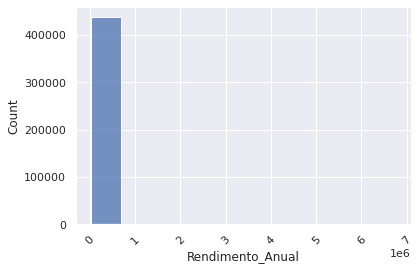

In [32]:
sns.histplot(data=dados_cad_id_unicos, x='Rendimento_Anual', bins=10)
plt.xticks(rotation=45)
plt.show()

Os *outliers* (para cima) distorcem nossa informação de tal maneira que o restante dos dados ficam concentrados em uma barra única.

Vamos verificar como fica o *boxplot* dessa mesma variável.

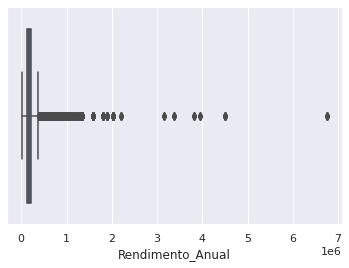

In [33]:
sns.boxplot(x=dados_cad_id_unicos.Rendimento_Anual)

Claramente precisamos tratar esses *outliers* para não penalizar o nosso futuro modelo de decisão. Se trabalhamos com dados com muitos *outliers* vamos tender a ter *overfit*, ou seja, um modelo que vai funcionar muito bem no treino mas terá uma performance fraca em produção.

Vamos estabelecer o limite para separar os *outliers* como sendo a média e dois desvios-padrão para cada lado.

In [34]:
renda = dados_cad_id_unicos.Rendimento_Anual
renda_med = renda.mean()
renda_std = renda.std()

renda_lim_sup = renda_med + 2 * renda_std
renda_lim_inf = renda_med - 2 * renda_std

renda_outliers = []

for index, valor in renda.items():
    if valor > renda_lim_sup or valor < renda_lim_inf:
        renda_outliers.append(index)

len(renda_outliers)

12641

In [35]:
dados_cad_sem_outliers = dados_cad_id_unicos.drop(renda_outliers)
dados_cad_sem_outliers.shape

(425822, 18)

In [36]:
# Maneira Alternativa
# Já gera os dataframes separados sem outliers e só de outliers

df_renda_outliers = dados_cad_id_unicos.query('Rendimento_Anual > @renda_lim_sup or Rendimento_Anual < @renda_lim_inf')
print(df_renda_outliers.shape)

df_renda_sem_outliers = dados_cad_id_unicos.query('Rendimento_Anual <= @renda_lim_sup and Rendimento_Anual >= @renda_lim_inf')
print(df_renda_sem_outliers.shape)

(12641, 18)
(425822, 18)


In [37]:
dados_cad_sem_outliers[cols_quantitativas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia
count,425822.000000,425822.000000,425822.000000,425822.000000,425822.000000
mean,43.838707,0.425314,176384.728083,5.744956,2.191683
std,11.525400,0.723577,75033.530551,6.736649,0.896300
min,21.000000,0.000000,26100.000000,-1.000000,1.000000
25%,34.000000,0.000000,117000.000000,1.000000,2.000000
50%,43.000000,0.000000,157500.000000,4.000000,2.000000
75%,53.000000,1.000000,225000.000000,8.500000,3.000000
max,69.000000,19.000000,405000.000000,48.000000,20.000000


Rodando agora o **`describe`** de nosso *dataset* podemos observar que as informações de rendimento anual não estão mais em notação científica, já estão sendo apresentados como números com formatação normal.

Vamos verificar como fica o histograma desses dados.

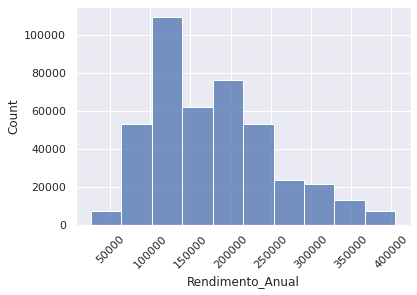

In [38]:
sns.histplot(data=dados_cad_sem_outliers, x='Rendimento_Anual', bins=10)
plt.xticks(rotation=45)
plt.show()

Temos agora uma melhor distribuição dos clientes nas 10 barras do histograma, com uma certa concentração mais à esquerda do gráfico. Isso já é esperado, pois normalmente temos mais pessoas ganhando menos e poucas pessoas com maiores rendimentos.

Vamos analisar da mesma forma a idade dos nossos clientes.

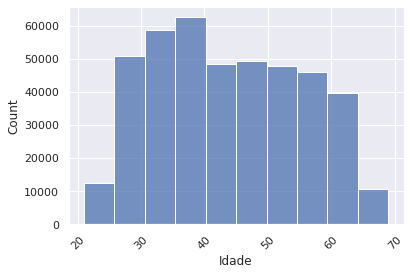

In [39]:
sns.histplot(data=dados_cad_sem_outliers, x='Idade', bins=10)
plt.xticks(rotation=45)
plt.show()

Podemos perceber uma distribuição regular das idades dos clientes, sem concentrações significativas em nenhuma faixa etária específica. Temos apenas um pouco mais de clientes entre os 30 e 40 anos, mas isso está de acordo com a pirâmide populacional.

Vamos analisar o tempo de empresa, mas para isso vamos desconsiderar aqueles clientes pensionistas que deixamos com o valor de -1.

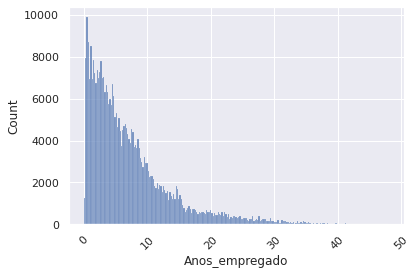

In [40]:
sns.histplot(data=dados_cad_sem_outliers.query('Anos_empregado >=0'), x='Anos_empregado')
plt.xticks(rotation=45)
plt.show()

Podemos observar que a grande maioria dos clientes está na faixa de 0 - 10 anos de empresa.

#### **Desafio 3 - Explorar Outras Técnicas de Identificar e Tratar** ***Outliers***
---

> z-score
> 


Uma das maneiras de se identificar *outliers* é usando o **`zscore`**, presente na biblioteca **`scipy.stats`**.

O [**`zscore`**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html) nos retorna quantos desvios-padrão o nosso dado está da média de valores do nosso conjunto de dados. Para obter o mesmo efeito que tivemos acima, deveríamos desprezar todos os dados que tivessem valor absoluto acima de 2.

In [41]:
from scipy import stats
stats.zscore(dados_cad_id_unicos.Rendimento_Anual)

array([ 2.17997265,  2.17997265, -0.68150387, ..., -1.21292093,
       -1.04940799, -0.59974739])

In [42]:
dados_desafio_3 = dados_cad_id_unicos.copy()
dados_desafio_3['zscore_renda'] = abs(stats.zscore(dados_cad_id_unicos.Rendimento_Anual))
dados_desafio_3_sem_outliers = dados_desafio_3[dados_desafio_3.zscore_renda <= 2].drop('zscore_renda', axis=1)
dados_desafio_3_sem_outliers.shape

(425822, 18)

Como pode ser visto pelas dimensões do *dataset* resultante, o resultado foi o mesmo do obtido anteriormente, durante a aula.

Encontrei também algumas funções para tratamento de *outliers* que copiei abaixo.

Essa primeira deve ser executada para cada coluna que desejamos limpar de nosso *dataframe*. Ela considera como limites para tratar um dado como *outlier* os extremos de um *boxplot* e exclui da base todas as linhas que contiverem *outliers*.

In [43]:
# https://www.ti-enxame.com/pt/python/detectar-e-excluir-outliers-no-dataframe-do-pandas/1046331960/
#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
# Deve ser executada para cada coluna que desejamos limpar
#------------------------------------------------------------------------------
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

Essa segunda função é executada uma única vez para todo o *dataframe*. A diferença aqui é no tratamento dado. Caso ela encontre algum *outlier*, a função substitui o valor pela mediana daquela coluna.

In [44]:
# https://www.ti-enxame.com/pt/python/detectar-e-excluir-outliers-no-dataframe-do-pandas/1046331960/
#------------------------------------------------------------------------------
# Outlier Treatment
# Substitui os dados outliers pela mediana
# Executa para todas as colunas do dataframe
#------------------------------------------------------------------------------
def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p
    return df

Por último, [aqui](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba) temos um artigo interessante sobre o assunto.

### **Vídeo 3 - Variáveis Categóricas**

Vamos agora analisar as variáveis categóricas de nosso *dataset*.

In [110]:
cols_categoricas = ['Genero', 'Tem_Carro', 'Tem_Casa_Propria', 'Tem_email',
                    'Estado_Civil', 'Tem_Celular','Tem_telefone_trabalho',
                    'Tem_telefone_fixo','Categoria_de_renda', 'Ocupacao',
                    'Grau_Escolaridade','Moradia']

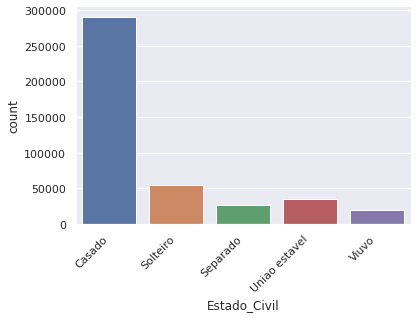

In [46]:
sns.countplot(x = 'Estado_Civil', data=dados_cad_sem_outliers)
plt.xticks(rotation=45, ha='right')
plt.show()

Temos uma forte predominância de **Casados**, mas ainda temos uma certa participação dos demais tipos de estado civil em nossa base.

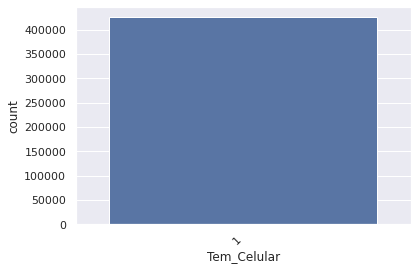

In [47]:
sns.countplot(x = 'Tem_Celular', data=dados_cad_sem_outliers)
plt.xticks(rotation=45, ha='right')
plt.show()

Como já tínhamos visto no desafio da aula anterior, 100% de nossos clientes declararam ter celular, tornando essa variável irrelevante para o nosso modelo.

Assim, ela pode ser descartada e simplificar o treinamento do modelo mais adiante.

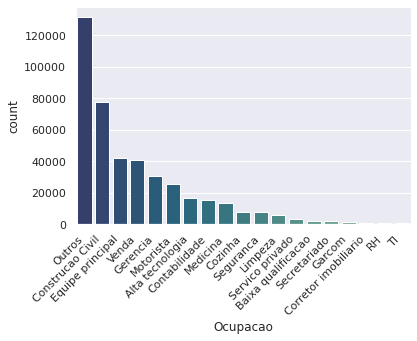

In [120]:
sns.countplot(x = 'Ocupacao', data=dados_cad_sem_outliers,
              order=dados_cad_sem_outliers['Ocupacao'].value_counts().index,
              palette = 'crest_r')
plt.xticks(rotation=45, ha='right')
plt.show()

Muitos clientes declararam a ocupação como **Outros**, isso chama a atenção.

Para analisar esse grupo, podemos verificar como eles se comportam em relação à renda anual.

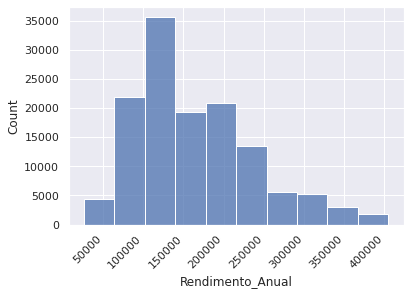

In [49]:
sns.histplot(data=dados_cad_sem_outliers.query('Ocupacao == "Outros"'), x='Rendimento_Anual', bins=10)
plt.xticks(rotation=45, ha='right')
plt.show()

 A distribuição da renda é muito semelhante à que obtivemos quando analisamos o *dataset* inteiro, apenas em uma escala de quantidades diferentes. Isso nos indica que não há uma concentração em alguma categoria que foi esquecida de relacionar nas opções de ocupação de nossa base de dados.

 Tenho uma suspeita de que a maior parte desses outros devem ser os pensionistas que já vimos anteriormente, vamos confirmar.

In [50]:
dados_cad_sem_outliers.query('Ocupacao == "Outros"')['Categoria_de_renda'].value_counts()

Pensionista            74479
Empregado              35178
Associado comercial    15762
Servidor publico        5971
Estudante                  5
Name: Categoria_de_renda, dtype: int64

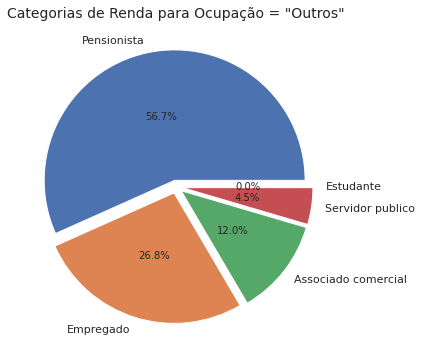

In [51]:
pie, ax = plt.subplots(figsize=[10,6])
labels = dados_cad_sem_outliers.query('Ocupacao == "Outros"')['Categoria_de_renda'].value_counts().keys()
plt.pie(x=dados_cad_sem_outliers.query('Ocupacao == "Outros"')['Categoria_de_renda'].value_counts(), autopct="%.1f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title('Categorias de Renda para Ocupação = "Outros"', fontsize=14);

In [52]:
dados_cad_sem_outliers.query('Categoria_de_renda == "Pensionista"')['Ocupacao'].value_counts()

Outros                74479
Equipe principal         31
Construcao Civil         31
Gerencia                 15
Motorista                11
Medicina                 10
Venda                     8
Alta tecnologia           6
Cozinha                   5
Contabilidade             5
Seguranca                 2
Secretariado              2
Baixa qualificacao        1
Name: Ocupacao, dtype: int64

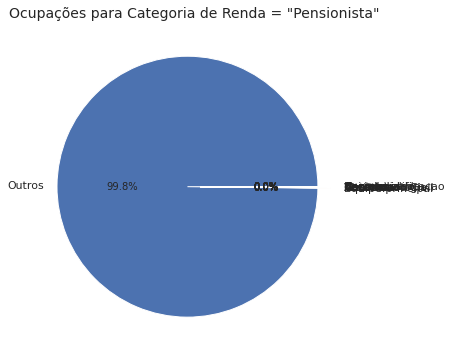

In [53]:
pie, ax = plt.subplots(figsize=[10,6])
labels = dados_cad_sem_outliers.query('Categoria_de_renda == "Pensionista"')['Ocupacao'].value_counts().keys()
plt.pie(x=dados_cad_sem_outliers.query('Categoria_de_renda == "Pensionista"')['Ocupacao'].value_counts(),
        autopct="%.1f%%", explode=[0.05]*len(dados_cad_sem_outliers.query('Categoria_de_renda == "Pensionista"')['Ocupacao'].value_counts()),
        labels=labels, pctdistance=0.5)
plt.title('Ocupações para Categoria de Renda = "Pensionista"', fontsize=14);

Como podemos ver acima, mais da metade dos **Outros** são **Pensionistas**. E praticamente todos os **Pensionistas** estão classificados como **Outros**, confirmando parcialmente minha hipótese.

---
Nesse momento a Karol fez uma explanação a respeito da regulamentação que o Banco Central (BaCen) impõe sobre os modelos de *credit score*.

Dentro dessa regulamentação o BaCen determina algumas informações que não podem ser consideradas, as chamadas **Informações Sensíveis**. São elas:
* Origem Social e Étnica
* Condições de Saúde
* Informação Genética
* Orientação Sexual
* Convicções Políticas, Religiosas e Filosóficas
---

Em função disso, além da coluna **`Tem_Celular`** que já havíamos decidido eliminar por não influenciar nosso modelo, por uma exigência legal também precisamos eliminar a coluna **`Genero`**.

In [54]:
dados_cad_tratamento1 = dados_cad_sem_outliers.drop(['Genero', 'Tem_Celular'], axis=1)
dados_cad_tratamento1.shape

(425822, 16)

In [111]:
cols_categoricas.remove('Genero')
cols_categoricas.remove('Tem_Celular')
cols_categoricas

['Tem_Carro',
 'Tem_Casa_Propria',
 'Tem_email',
 'Estado_Civil',
 'Tem_telefone_trabalho',
 'Tem_telefone_fixo',
 'Categoria_de_renda',
 'Ocupacao',
 'Grau_Escolaridade',
 'Moradia']

#### **Desafio 4 - Criar uma Função para Gerar os Gráficos**
---


In [102]:
def graf_quants(dados, lista):
    linhas = round((len(lista)+ 0.45) / 2 )
    fig, ax = plt.subplots(nrows=linhas, ncols=2, figsize=(12,8))
    fig.suptitle('Variáveis Quantitativas', fontsize=20, fontweight='bold')
    loc_graf_x = 0
    loc_graf_y = 0
    for var in lista:
        ax[loc_graf_x, loc_graf_y] = sns.boxplot(x=dados[var], ax=ax[loc_graf_x, loc_graf_y])
        ax[loc_graf_x, loc_graf_y].set_title(var, fontsize=16, fontweight='bold')
        ax[loc_graf_x, loc_graf_y].set_xlabel('')

        plt.draw()
        xlabels = ax[loc_graf_x, loc_graf_y].get_xticklabels()
        ax[loc_graf_x, loc_graf_y].set_xticklabels(xlabels, rotation=45, ha='right')
        
        # Alternativa para rotacionar os ticks, mas não consegue alinhar
        # Também pode alterar outros parâmetros
        #ax[loc_graf_x, loc_graf_y].tick_params(direction='out', length=6, width=2, colors='r',
        #       grid_color='r', grid_alpha=0.5)
        #ax[loc_graf_x, loc_graf_y].tick_params(labelrotation=45)

        # Outra alternativa para rotacionar os ticks
        # Deve ter pior performance por ter que fazer um a um
        #for tick in ax[loc_graf_x, loc_graf_y].get_xticklabels():
        #    tick.set_rotation(45)
        #    tick.set_ha('right')

        if loc_graf_y == 0:
            loc_graf_y = 1
        else:
            loc_graf_y = 0
            loc_graf_x += 1
    plt.subplots_adjust(wspace=0.2,
                        hspace=0.65)

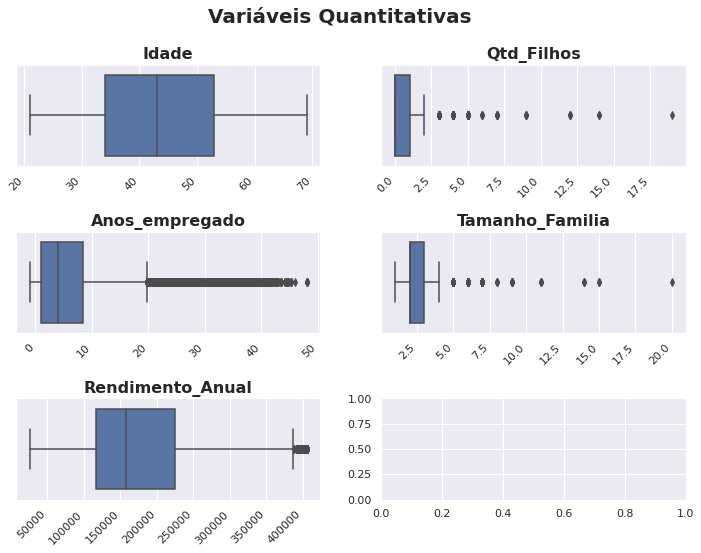

In [103]:
graf_quants(dados_cad_sem_outliers, cols_quantitativas)

In [117]:
def graf_categs(dados, lista):
    #linhas = round((len(lista)+ 0.5) / 3 )
    linhas = round((len(lista)+ 0.45) / 4 )
    #fig, ax = plt.subplots(nrows=linhas, ncols=3, figsize=(21,10))
    fig, ax = plt.subplots(nrows=linhas, ncols=4, figsize=(21,10))
    fig.suptitle('Variáveis Categóricas', fontsize=20, fontweight='bold')
    loc_graf_x = 0
    loc_graf_y = 0
    for var in lista:
        ax[loc_graf_x, loc_graf_y] = sns.countplot(x=dados[var], ax=ax[loc_graf_x, loc_graf_y],
                                                   order=dados[var].value_counts().index,
                                                   palette='crest_r')
        ax[loc_graf_x, loc_graf_y].set_title(var, fontsize=16, fontweight='bold')
        ax[loc_graf_x, loc_graf_y].set_xlabel('')

        plt.draw()
        xlabels = ax[loc_graf_x, loc_graf_y].get_xticklabels()
        ax[loc_graf_x, loc_graf_y].set_xticklabels(xlabels, rotation=45, ha='right', fontsize=10)
        
        if loc_graf_y != 3:
            loc_graf_y += 1
        else:
            loc_graf_y = 0
            loc_graf_x += 1

    plt.subplots_adjust(wspace=0.3,
                        hspace=1.)

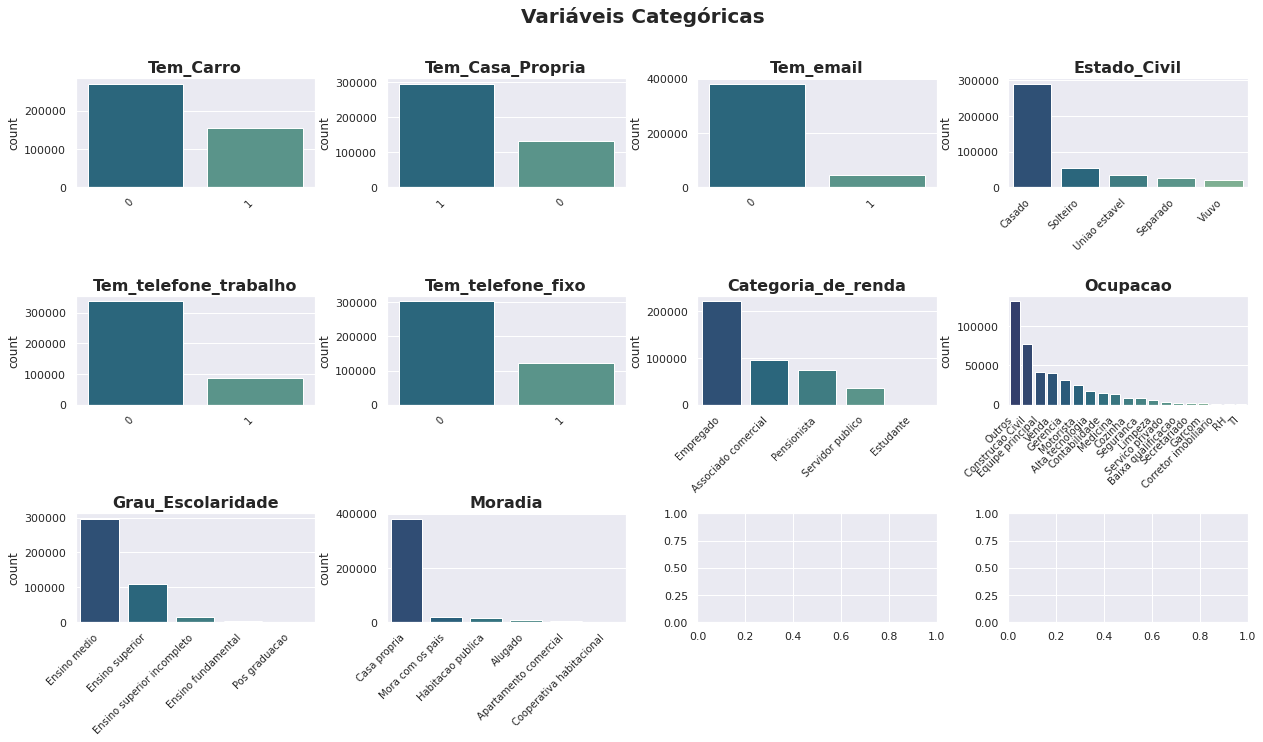

In [118]:
graf_categs(dados_cad_sem_outliers, cols_categoricas)

#### **Desafio 5 - Continuar a Análise Exploratória**
---

Complementei a análise exploratória ao longo do *notebook*, para ficar mais fácil de pegar o contexto.

#### **O que aprendemos nessa aula?**
---

>* **Variáveis Contínuas:**
>
>  * Identificar e Diferenciar Variáveis Contínuas, Categóricas Binárias e Categóricas Não Binárias;
>  * Tratamento de *Outliers*.
>
>* **Variáveis Categóricas:**
>
>  * Visualizar a distribuição de algumas variáveis categóricas através de histogramas;
>  * Limitações legais para um modelo de crédito.
---










